In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os
from osgeo import gdal

In [9]:
aug_r10='S2A_MSIL1C_20220903T060641_N0400_R134_T42RUR_20220903T080135/S2A_MSIL1C_20220903T060641_N0400_R134_T42RUR_20220903T080135.SAFE/GRANULE/L1C_T42RUR_A037597_20220903T062055/IMG_DATA/'

band3=rasterio.open(aug_r10 + "T42RUR_20220903T060641_B03.jp2") #green
band8=rasterio.open(aug_r10 + "T42RUR_20220903T060641_B08.jp2") #nir
band11=rasterio.open(aug_r10 + "T42RUR_20220903T060641_B11.jp2") #swir

In [13]:
meta = band3.meta
meta.update({"count": 3})

In [14]:
prefire_rgb_path = 'S2A_MSIL1C_20220903T060641_N0400_R134_T42RUR_20220903T080135/T42RUR_20220903T060641GNS.tif'

with rasterio.open(prefire_rgb_path, 'w', **meta) as dest:
    dest.write(band3.read(1),1)
    dest.write(band8.read(1),2)
    dest.write(band11.read(1),3)

In [15]:
img = rasterio.open(prefire_rgb_path)

In [16]:
image = np.array([img.read(3), img.read(2), img.read(1)])
image.shape

(3, 10980, 10980)

In [17]:
image = image.transpose(1,2,0)

In [19]:
from skimage import exposure


p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

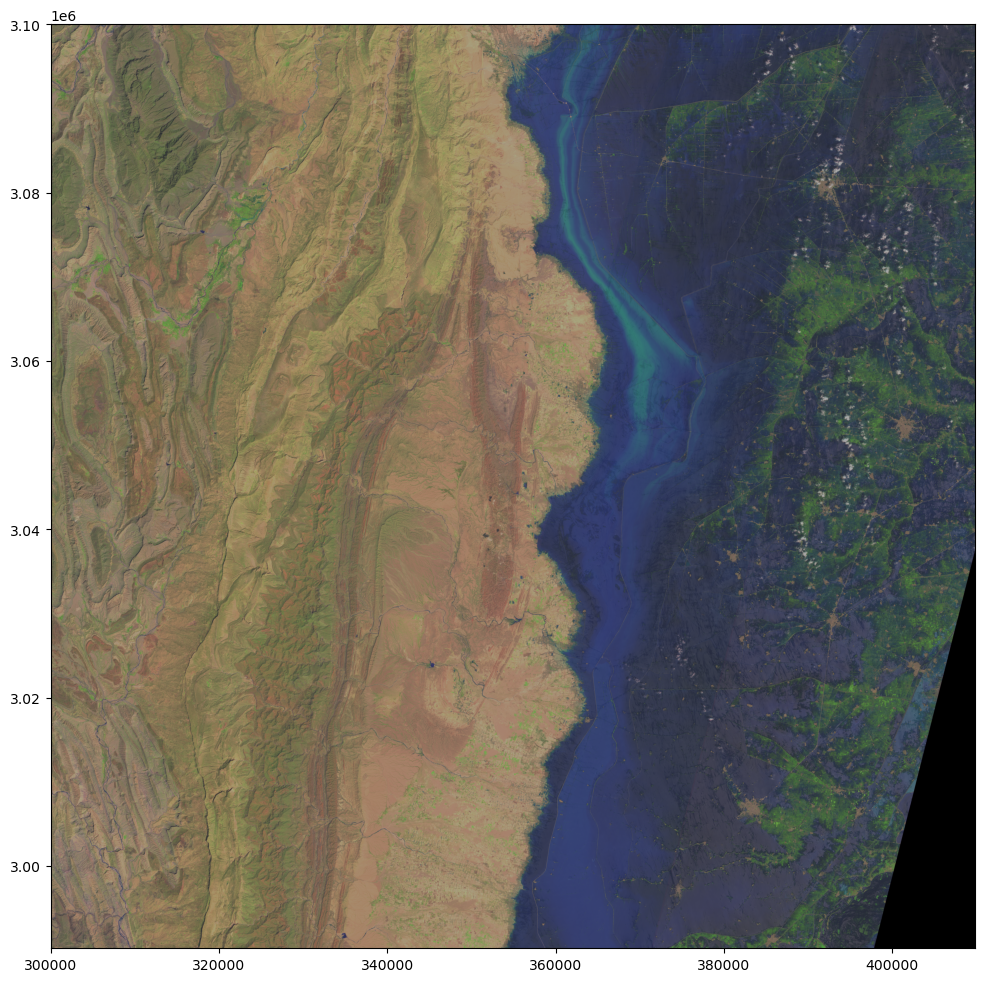

<AxesSubplot:>

In [21]:
from rasterio import plot
from rasterio.plot import show

# Define a plot
fig = plt.figure(figsize=(20,12))

# Show the figure
show(image.transpose(2,0,1), transform=img.transform)

In [22]:
image.shape

(10980, 10980, 3)